<a href="https://colab.research.google.com/github/JohanPP24/UAS-AI/blob/main/KLASIFIKASI_OBESITAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Klasifikasi Obesitas menggunakan KNN**

**Dibuat oleh :**                                   

**Nama : Johan Putra Pradana**

**NIM : 312110314**

**Kelas : TI.21.B.SE2**

**Prodi : Teknik Infomatika**     


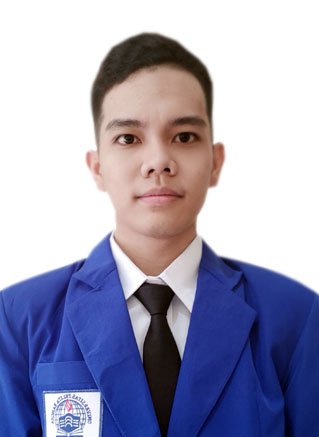













In [1]:
# import numpy as np: numpy adalah library yang digunakan untuk operasi numerik, manipulasi array, dan perhitungan matematis.
# np adalah alias yang umum digunakan untuk numpy agar penulisan kode lebih ringkas.
import numpy as np # Untuk manipulasi array dan operasi numerik

# import pandas as pd: pandas adalah library yang digunakan untuk manipulasi dan analisis data berbentuk tabel, seperti DataFrame dan Series.
# pd adalah alias yang digunakan untuk pandas, yang memudahkan penulisan kode.
import pandas as pd # Untuk bekerja dengan DataFrame dan struktur data tabular

# import matplotlib.pyplot as plt: matplotlib.pyplot adalah modul dari library matplotlib yang digunakan untuk membuat grafik dan plot dalam Python.
# plt adalah alias yang digunakan untuk matplotlib.pyplot.
import matplotlib.pyplot as plt # Untuk visualisasi data, membuat grafik dan plot

# import seaborn as sns: seaborn adalah library yang dibangun di atas matplotlib untuk visualisasi statistik yang lebih menarik dan mudah digunakan.
# sns adalah alias yang digunakan untuk seaborn.
import seaborn as sns # Untuk visualisasi statistik yang lebih canggih

In [2]:
# Mengambil dataset dari URL dan membaca ke dalam DataFrame
# fdata = "URL": Menyimpan URL file CSV yang berisi dataset ke dalam variabel fdata. URL ini mengarah ke dataset "Obesity Classification" yang dihosting di GitHub.
fdata="https://github.com/JohanPP24/UAS-AI/raw/9ade5ef90f2fa74e56cbede6e125f9d164a5845b/%E2%80%9Cdataset/Obesity%20Classification.csv"
df = pd.read_csv(fdata) # Membaca data CSV dari URL ke dalam DataFrame
df.head() # Menampilkan 5 baris pertama dari dataset

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,Male,175,80,25.3,Normal Weight
1,2,30,Female,160,60,22.5,Normal Weight
2,3,35,Male,180,90,27.3,Overweight
3,4,40,Female,150,50,20.0,Underweight
4,5,45,Male,190,100,31.2,Obese


In [3]:
#Analisis jumlah data awal, deteksi duplikasi, dan hitung data setelah eliminasi duplikasi

# Menampilkan jumlah data dalam dataset
print(f"Jumlah data : {df.shape[0]}") # df.shape[0] mengambil jumlah baris dari DataFrame df, yang menunjukkan total jumlah data.

# Menampilkan jumlah data duplikasi dalam dataset
print(f"Jumlah data duplikasi : {df[df.duplicated()].shape[0]}") # df[df.duplicated()].shape[0]: shape[0] di sini menghitung jumlah baris pada subset tersebut, yang berarti jumlah data yang terdeteksi sebagai duplikasi.

# Menghapus duplikasi data dalam DataFrame df
# drop_duplicates() adalah metode pandas yang digunakan untuk menghapus baris yang terduplikasi dalam DataFrame df.
# inplace=True membuat perubahan langsung pada DataFrame df tanpa perlu membuat salinan baru. Artinya, DataFrame df yang asli akan dimodifikasi.
df.drop_duplicates(inplace=True)


# Menampilkan jumlah data setelah duplikasi dihapus
# df.shape[0]: Setelah duplikasi dihapus, df.shape[0] digunakan untuk menghitung jumlah baris yang tersisa dalam DataFrame, yaitu jumlah data yang tidak terduplikasi.
print(f"Jumlah setelah dihapus data duplikasi : {df.shape[0]}")

Jumlah data : 108
Jumlah data duplikasi : 0
Jumlah setelah dihapus data duplikasi : 108


In [4]:
# Mengecek jumlah nilai kosong (missing values) pada setiap kolom dalam DataFrame df
# df.isnull() Fungsi ini akan menghasilkan DataFrame boolean dengan nilai True untuk setiap elemen yang bernilai NaN (Not a Number) atau kosong pada DataFrame df, dan False untuk nilai lainnya.
# .sum() Setelah mengidentifikasi nilai NaN dengan isnull(), fungsi .sum() digunakan untuk menghitung jumlah nilai True pada setiap kolom, yang mewakili jumlah nilai kosong (missing values) pada kolom tersebut.
df.isnull().sum()

,0
ID,0
Age,0
Gender,0
Height,0
Weight,0
BMI,0
Label,0


In [5]:
# Mengimpor train_test_split dari sklearn.model_selection
# train_test_split : Fungsi ini digunakan untuk membagi dataset menjadi dua bagian: data latih (training set) dan data uji (test set). Pembagian ini sangat penting dalam pelatihan dan evaluasi model machine learning untuk menghindari overfitting dan untuk mengukur kinerja model pada data yang tidak terlihat sebelumnya.
from sklearn.model_selection import train_test_split

# Mengambil kolom 'Gender' sebagai target (Y) dan sisa kolom sebagai fitur (X)
Y = df['Gender']
X = df.drop("Gender", axis=1)

# Membagi data menjadi data latih (X_train, Y_train) dan data uji (X_test, Y_test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=True, stratify=Y, random_state=12)

# Menampilkan jumlah data latih dan data uji
print(f"Jumlah data train: {len(X_train)}")
print(f"Jumlah data test: {len(X_test)}")

Jumlah data train: 86
Jumlah data test: 22


In [6]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Memuat dataset dari URL
fdata = "https://github.com/JohanPP24/UAS-AI/raw/9ade5ef90f2fa74e56cbede6e125f9d164a5845b/%E2%80%9Cdataset/Obesity%20Classification.csv"

# Menggunakan pd.read_csv() untuk memuat dataset dari URL yang diberikan
# menampilkan 5 baris pertama menggunakan df.head().
df = pd.read_csv(fdata)

# Melihat beberapa baris pertama dataset
print(df.head())

# Memisahkan fitur (X) dan target (Y)
# Fitur (X) Mengambil semua kolom kecuali kolom 'Gender'.
X = df.drop("Gender", axis=1)  # Misalnya "Gender" adalah kolom target

# Target (Y): Kolom 'Gender' sebagai target label.
Y = df["Gender"]  # Target label

# Membagi data menjadi data latih dan data uji
# Menggunakan train_test_split() untuk membagi data menjadi 80% data latih dan 20% data uji dengan shuffle=True dan stratify=Y untuk menjaga distribusi label.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=True, stratify=Y, random_state=12)

# Menampilkan jumlah data latih dan data uji
print(f"Jumlah data latih: {len(X_train)}")
print(f"Jumlah data uji: {len(X_test)}")

# Menggunakan LabelEncoder untuk kolom 'Gender' (kategori)
# Menggunakan LabelEncoder untuk mengubah label target yang bersifat kategorikal menjadi angka untuk mempermudah pemodelan.
lbl_encoder = LabelEncoder()
Y_train_enc = lbl_encoder.fit_transform(Y_train)
Y_test_enc = lbl_encoder.transform(Y_test)

# Memisahkan kolom numerik dan kategorikal untuk standarisasi
# Memisahkan kolom numerik untuk dilakukan standarisasi menggunakan StandardScaler.
# Data latih distandarisasi menggunakan fit_transform() dan data uji dengan transform() untuk menghindari kebocoran data.
X_train_numeric = X_train.select_dtypes(include=['float64', 'int64'])
X_test_numeric = X_test.select_dtypes(include=['float64', 'int64'])

# Membuat objek StandardScaler
scl = StandardScaler()

# Menstandarisasi data pelatihan (fit dan transform) hanya untuk data numerik
X_train_scl = scl.fit_transform(X_train_numeric)

# Menstandarisasi data pengujian (transform) hanya untuk data numerik
X_test_scl = scl.transform(X_test_numeric)

# Menampilkan hasil transformasi
print(f"Data Latih setelah standarisasi:\n{X_train_scl[:5]}")
print(f"Data Uji setelah standarisasi:\n{X_test_scl[:5]}")
print(f"Label Latih setelah encoding:\n{Y_train_enc[:5]}")
print(f"Label Uji setelah encoding:\n{Y_test_enc[:5]}")

   ID  Age  Gender  Height  Weight   BMI          Label
0   1   25    Male     175      80  25.3  Normal Weight
1   2   30  Female     160      60  22.5  Normal Weight
2   3   35    Male     180      90  27.3     Overweight
3   4   40  Female     150      50  20.0    Underweight
4   5   45    Male     190     100  31.2          Obese
Jumlah data latih: 86
Jumlah data uji: 22
Data Latih setelah standarisasi:
[[-1.37176353  0.16075968  1.17062223  1.36863803  1.3847924 ]
 [ 0.42558868 -1.07207253 -0.27014359 -1.00235505 -0.92429493]
 [ 1.11185044  0.16075968 -1.35071796 -0.66364175 -0.48569734]
 [ 0.91577565 -1.16013198 -0.27014359 -1.34106835 -1.56929139]
 [ 0.29487216  0.29284885 -1.35071796  0.18314149  0.28829842]]
Data Uji setelah standarisasi:
[[-1.50248005 -0.71983476  0.45023932  0.69121144  0.62369658]
 [-0.06459828  2.31821606  1.17062223  1.19928139  0.84299538]
 [-1.69855484  0.46896774  1.17062223  1.70735133  1.77179028]
 [ 1.01381305 -0.49968615  0.81043077 -0.66364175 -0.

In [8]:
X_train

,ID,Age,Height,Weight,BMI,Label
16,17,48,200,100,31.2,Obese
69,72,20,160,30,13.3,Underweight
90,93,48,130,40,16.7,Underweight
84,87,18,160,20,8.3,Underweight
65,68,51,130,65,22.7,Normal Weight
...,...,...,...,...,...,...
19,21,63,120,30,13.3,Underweight
64,67,46,200,85,26.1,Overweight
35,38,54,130,85,27.5,Overweight
99,102,42,200,30,13.3,Underweight


In [9]:
X_train_scl

array([[-1.37176353e+00,  1.60759683e-01,  1.17062223e+00,
         1.36863803e+00,  1.38479240e+00],
       [ 4.25588685e-01, -1.07207253e+00, -2.70143591e-01,
        -1.00235505e+00, -9.24294930e-01],
       [ 1.11185044e+00,  1.60759683e-01, -1.35071796e+00,
        -6.63641752e-01, -4.85697336e-01],
       [ 9.15775652e-01, -1.16013198e+00, -2.70143591e-01,
        -1.34106835e+00, -1.56929139e+00],
       [ 2.94872160e-01,  2.92848849e-01, -1.35071796e+00,
         1.83141492e-01,  2.88298419e-01],
       [ 7.85059128e-01, -8.95953646e-01,  4.50239319e-01,
        -4.94285103e-01, -2.27698751e-01],
       [ 1.27524610e+00, -9.84013090e-01,  4.50239319e-01,
        -1.34106835e+00, -1.56929139e+00],
       [ 5.56305210e-01, -1.91478093e-01, -9.90526501e-01,
        -3.24928454e-01, -5.99996709e-02],
       [ 6.21663472e-01,  2.48819127e-01, -1.35071796e+00,
         1.37848435e-02,  2.62498560e-01],
       [-1.63319658e+00,  9.09264957e-01,  1.53081368e+00,
         2.04606463e+00

In [10]:
Y_train

,Gender
16,Male
69,Female
90,Female
84,Female
65,Female
...,...
19,Female
64,Male
35,Female
99,Male


In [11]:
Y_train_enc

array([1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1])

In [12]:
# Mengimpor KNeighborsClassifier dari sklearn.neighbors
# Baris kode ini mengimpor kelas KNeighborsClassifier dari modul neighbors dalam pustaka scikit-learn.
# KNeighborsClassifier adalah sebuah model untuk klasifikasi yang menggunakan algoritma K-Nearest Neighbors (KNN), di mana untuk setiap data yang ingin diprediksi, model akan mencari 'k' data tetangga terdekat dan menentukan label berdasarkan mayoritas dari tetangga tersebut.
from sklearn.neighbors import KNeighborsClassifier

In [13]:
# Membuat objek classifier KNN dengan jumlah tetangga terdekat (n_neighbors) sebanyak 5
# Membuat objek knn_classifier dari kelas KNeighborsClassifier. Parameter n_neighbors=5 menunjukkan bahwa model akan mempertimbangkan 5 tetangga terdekat untuk membuat prediksi.
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Melatih model KNN menggunakan data latih yang sudah distandarisasi (X_train_scl) dan label target (Y_train_enc)
# fit() digunakan untuk melatih model KNN dengan data latih
# (X_train_scl adalah fitur yang sudah distandarisasi
# Y_train_enc adalah label target yang sudah diencoding).
# Model KNN akan mempelajari hubungan antara fitur dan label dalam data latih.
knn_classifier.fit(X_train_scl, Y_train_enc)

KNeighborsClassifier()

In [14]:
# accuracy_score Fungsi ini digunakan untuk menghitung akurasi prediksi model dengan membandingkan hasil prediksi dengan label yang benar.
# confusion_matrix Fungsi ini digunakan untuk menghasilkan confusion matrix, yang menunjukkan perbandingan antara nilai prediksi model dengan nilai sebenarnya.
from sklearn.metrics import accuracy_score, confusion_matrix

In [15]:
# Untuk prediksi menggunakan model KNN pada data uji yang telah distandarisasi
# knn_classifier adalah objek model K-Nearest Neighbors yang sudah dilatih sebelumnya dengan data latih.
# predict(X_test_scl) digunakan untuk memprediksi label target pada data uji (X_test_scl), yang merupakan fitur yang sudah distandarisasi.
knn_predictions = knn_classifier.predict(X_test_scl)

# Untuk menghitung akurasi model dengan membandingkan label yang diprediksi dengan label yang sebenarnya
# Y_test_enc adalah label sebenarnya dari data uji yang telah diubah ke bentuk numerik (encoded).
# knn_predictions adalah hasil prediksi yang diperoleh dari model.
# Fungsi accuracy_score menghitung akurasi dengan membandingkan label sebenarnya dan label prediksi.
knn_accuracy = accuracy_score(Y_test_enc, knn_predictions)

# ntuk menampilkan hasil akurasi
print(f'KNN accuracy: {knn_accuracy:.2f}') #untuk menampilkan akurasi model dalam format persentase dengan dua angka di belakang koma.

KNN accuracy: 1.00


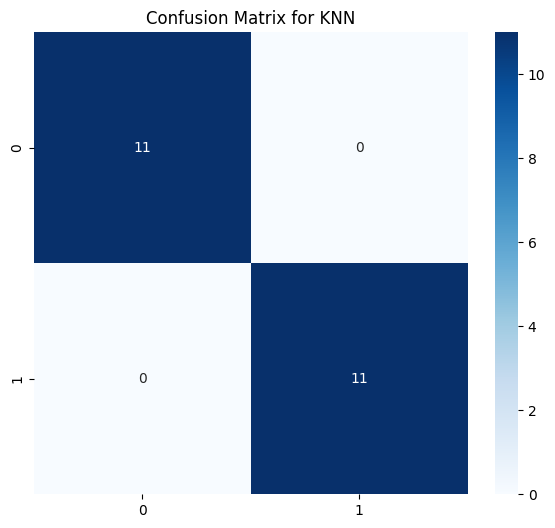

In [16]:
# Membuat confusion matrix
# confusion_matrix(Y_test_enc, knn_predictions):Fungsi confusion_matrix digunakan untuk menghitung matriks kebingungannya, yang membandingkan label sebenarnya (Y_test_enc) dengan prediksi model (knn_predictions).
# Matriks kebingungannya menggambarkan berapa banyak prediksi yang benar dan salah untuk masing-masing kelas.
cm=confusion_matrix(Y_test_enc,knn_predictions)

# Menampilkan confusion matrix menggunakan heatmap
# plt.figure(figsize=(7, 6)): Fungsi plt.figure() digunakan untuk menentukan ukuran gambar plot. Dalam hal ini, ukuran plot adalah 7x6 inci.
plt.figure(figsize=(7, 6))

# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues'): Menggunakan seaborn untuk menampilkan confusion matrix dalam bentuk heatmap.
# annot=True akan menampilkan nilai-nilai numerik di setiap sel.
# fmt='d' berarti format angka adalah bilangan bulat (integer).
# cmap='Blues' menentukan skema warna untuk heatmap.
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Menambahkan judul
# plt.title('Confusion Matrix for KNN'): Memberikan judul untuk plot agar jelas bahwa ini adalah confusion matrix untuk model KNN.
plt.title('Confusion Matrix for KNN')

# Menampilkan plot
plt.show()

In [17]:
# from sklearn.model_selection import cross_val_score adalah Perintah ini mengimpor fungsi cross_val_score dari modul model_selection di library scikit-learn.
# Fungsi cross_val_score digunakan untuk melakukan cross-validation, yaitu teknik evaluasi model dengan membagi data menjadi beberapa bagian (folds) dan melatih serta menguji model pada bagian yang berbeda.
# Fungsi ini mengembalikan skor model berdasarkan beberapa lipatan data, yang memungkinkan Anda menilai kinerja model secara lebih konsisten dan mengurangi kemungkinan overfitting.
from sklearn.model_selection import cross_val_score


In [18]:
# Inisialisasi model K-Nearest Neighbors dengan 5 neighbors
# knn = KNeighborsClassifier(n_neighbors=5) yaitu membuat objek KNeighborsClassifier dengan parameter n_neighbors=5, yang berarti model akan mempertimbangkan 5 tetangga terdekat saat melakukan prediksi.
knn=KNeighborsClassifier(n_neighbors=5)

# Melakukan cross-validation dengan 5 fold
# score_sc = cross_val_score(knn, X_train_scl, Y_train_enc, cv=5) yaitu melakukan cross-validation pada data pelatihan (X_train_scl) dan target pelatihan (Y_train_enc) dengan menggunakan 5 fold (ditentukan oleh parameter cv=5).
score_sc=cross_val_score(knn,X_train_scl,Y_train_enc,cv=5)

# Menampilkan skor cross-validation
# print(score_sc): Menampilkan skor cross-validation untuk setiap fold.
print(score_sc)

# Menampilkan rata-rata skor dari 5 fold
# print(f"Rata-rata score dengan 5 fold: {score_sc.mean()}") yaitu Menampilkan rata-rata skor dari hasil 5 fold, yang memberi gambaran tentang kinerja model secara keseluruhan.
print(f"Rata score dengan 5 fold : {score_sc.mean()}")


[1.         0.94117647 0.94117647 1.         0.88235294]
Rata score dengan 5 fold : 0.9529411764705882


In [19]:
# Menentukan range nilai n_neighbors untuk KNN (dari 1 sampai 50, step 2)
# n_ = range(1, 51, 2): Membuat range nilai untuk n_neighbors mulai dari 1 hingga 50 dengan interval 2.
n_ = range(1, 51, 2)

# Menyiapkan list untuk menyimpan hasil skor
# train, test = [], []: Menyiapkan dua list kosong untuk menyimpan skor akurasi model pada data latih dan data uji.
train, test = [], []

# Melakukan perulangan untuk setiap nilai n_neighbors dalam n_
# Melakukan iterasi untuk setiap nilai n_neighbors dalam n_.
for n in n_:
    # Inisialisasi model KNN dengan n_neighbors yang berbeda
    # Membuat objek K-Nearest Neighbors dengan nilai n_neighbors yang berbeda.
    knn = KNeighborsClassifier(n_neighbors=n)

    # Melatih model menggunakan data latih
    knn.fit(X_train_scl, Y_train_enc)

    # Menyimpan skor akurasi pada data latih
    train.append(knn.score(X_train_scl, Y_train_enc))

    # Menyimpan skor akurasi pada data uji
    test.append(knn.score(X_test_scl, Y_test_enc))

# Menampilkan hasil skor akurasi untuk data latih dan data uji
print("Skor Akurasi Data Latih:", train)
print("Skor Akurasi Data Uji:", test)


Skor Akurasi Data Latih: [1.0, 0.9883720930232558, 0.9883720930232558, 1.0, 1.0, 0.9767441860465116, 0.9767441860465116, 0.9534883720930233, 0.9534883720930233, 0.9767441860465116, 0.9418604651162791, 0.9534883720930233, 0.9534883720930233, 0.9418604651162791, 0.9302325581395349, 0.9186046511627907, 0.9069767441860465, 0.9186046511627907, 0.9069767441860465, 0.8953488372093024, 0.9069767441860465, 0.9069767441860465, 0.8953488372093024, 0.9069767441860465, 0.9069767441860465]
Skor Akurasi Data Uji: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9090909090909091, 1.0, 0.9545454545454546, 0.9090909090909091, 0.9090909090909091, 0.9090909090909091, 0.9545454545454546, 0.9545454545454546, 0.9545454545454546, 0.9545454545454546, 0.9545454545454546, 0.9545454545454546, 0.9545454545454546, 0.9545454545454546, 0.9545454545454546, 0.9545454545454546, 0.9545454545454546]


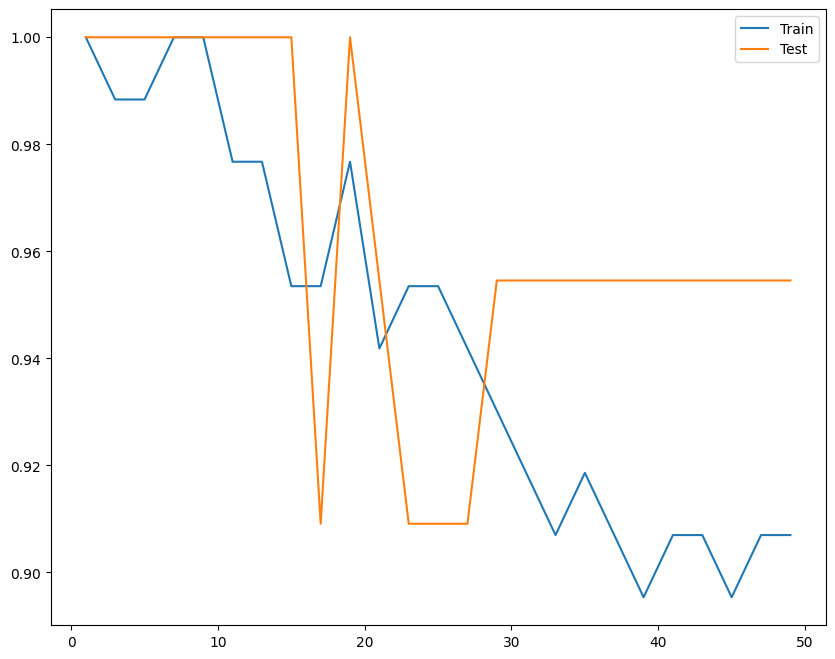

In [20]:
# Mengatur ukuran figure untuk plot
plt.figure(figsize=(10, 8)) # Menentukan ukuran figure untuk plot (lebar 10 inci, tinggi 8 inci).

# Plot akurasi pada data latih dan data uji
# Membuat plot dengan sumbu x adalah n_ (nilai n_neighbors)
# Sumbu y adalah train (skor akurasi untuk data latih). Label 'Train' digunakan untuk plot ini.
plt.plot(n_, train, label='Train')

# Membuat plot dengan sumbu x adalah n_ (nilai n_neighbors)
# Sumbu y adalah test (skor akurasi untuk data uji). Label 'Test' digunakan untuk plot ini.
plt.plot(n_, test, label='Test')

# Menambahkan legend untuk membedakan antara data latih dan uji
# Menambahkan legenda untuk membedakan antara grafik untuk data latih dan data uji.
plt.legend()

# Menampilkan plot
plt.show() # Menampilkan plot tersebut.


In [21]:
# Menampilkan skor tertinggi untuk data uji
# Fungsi np.max() digunakan untuk mendapatkan nilai maksimum dari list atau array test, yang berisi skor akurasi pada data uji.
print(f"Max Test Score adalah {np.max(test)}")

# Menampilkan nilai n_neighbors terbaik yang memberikan skor tertinggi pada data uji
# mengembalikan indeks dari nilai maksimum dalam array test. Indeks ini digunakan untuk mencari nilai n_neighbors yang menghasilkan akurasi tertinggi.
print(f"K Neighboard terbaik adalah {n_[np.argmax(test)]}")

#n_[np.argmax(test)] Ini adalah cara untuk mengambil nilai n_neighbors yang sesuai dengan indeks nilai maksimum pada array test.

Max Test Score adalah 1.0
K Neighboard terbaik adalah 1
